# Challenge Tier - II
## Shor's Algorithm

## Introduction
As its quite obvious now, classical computation has its own limitations and over the years we have learnt to use it to our advantage in some sense. The widely use cryptosystem, RSA, relies on the factoring being impossible for large numbers or integers. Classical computers arent nearly powerful to crack the 128 or 256 bit encryptions we use now.

Shor's algorithm shows that using a quantum computer it is possible to factor a number into its primes efficiently. To run this algorithm however, we need millions of qubits and gates and these circuits are too big to run on todays quantum computers. 

In this task, we will be asking you to implement a very curcial step to implement the shor's algorithm and not the algorithm itself. The algorithm's entire working will not be essential for completing this task 
but if you would like to understand what's going on in this exercise you might want to check out the working of the shor's algorithm on the whole.

## References

1) Neilsen and Chuang, the holy grail of books on quantum computing for the theory.

2) [Qiskit Textbook page on Shor's algorithm](https://qiskit.org/textbook/ch-algorithms/shor.html), for the code implementation and running on an actual quantum computer

## Phase Estimation

Phase estimation is a an important problem in quantum computing. Since we are using qubits that can be in any one of the infinite possible states based on their global phases, its important to be able to estimate what this global phase is. 

For example, take the state $|0\rangle$, this has a global phase of $ 2n\pi$, where it can be written as $e^{i2n\pi}|0\rangle$. But what if we added a relative phase to it? Lets say, we have $i|0\rangle$; the phase here is $\pi$ (or the state is $e^{inpi}|0\rangle$). 

To know more about how phase estimation works and how the algorithms works: 
[Qiskit Textbook page on Quantum Phase Estimation](https://qiskit.org/textbook/ch-algorithms/quantum-phase-estimation.html)

How exactly is this relevant to what we are doing here? Well thanks to Peter Shor, it was realised that if we perform a phase estimation on a unitary gate that behaves like $U|y\rangle = |ay\bmod N\rangle$, then we can use it to factorise a given number. 

## Problem Statement 

Lets consider an example that has a period of 4. You'll understand why specifically 4 in a while. Consider the unitary operator that performs the following operation:
$$
U|y\rangle = |11y\bmod 61\rangle
$$
The end goal of this exercise would be to implement this circuit, but in a very efficient way so that it can be run even on a real quantum computer. Notice that, if we take $|y\rangle = |1\rangle$ and we apply the unitary on the state multiple times, 

$$
\begin{aligned}
U|1\rangle &= |11\rangle \\
UU|1\rangle &= |60\rangle \\
UUU|1\rangle &= |50\rangle \\
UUUU|1\rangle &= |1\rangle \\
\end{aligned}
$$

So, the unitary that we have chosen specifically here has a period of 4. Usually we'd have to figure out the period of $a^r\bmod N$ to proceed with the shor's algorithm but our task here is just to implement the unitary itself. We'll be breaking this down into smaller steps. 


Since we have 4 different states, since the period is 4 we can in a way work this around by 'reassigning' the 4 values to the 4 two-qubit states. 

$$
\begin{aligned}
|1\rangle &\rightarrow |00\rangle \\
|11\rangle &\rightarrow |01\rangle \\
|60\rangle &\rightarrow |10\rangle \\
|50\rangle &\rightarrow |11\rangle \\
\end{aligned}
$$

Now our task just comes down to preparing this unitary (building $U$, $U^2$, $U^4$) for us to use this in a phase estimation circuit to find the phase and hence completing a crucial step in shor's algorithm. 

</div>
<div class="alert alert-block alert-danger">
    
Your circuit can only contain [CNOTs](https://qiskit.org/documentation/stubs/qiskit.circuit.library.CXGate.html) and single qubit unitary gates [U-gates](https://qiskit.org/documentation/stubs/qiskit.circuit.library.UGate.html). The transpiled circuits will be scored based on the number of CNOTs you use (less is better), as multi-qubit gates are usually much more difficult to carry out on hardware than single-qubit gates. 
    
</div>

## Exercises:

To implement the phase estimation algorithm, we won't just need a gate that performs U but we'll need controlled operation of U on the target qubit (initialised to $|0\rangle$). Hence, all the tasks in this notebook would require you to build a controlled operation and finally compile all of them into a phase estimation circuit. 


### Task 1:
Create a circuit ($U$) that performs the unitary transformation described above

$$
\begin{aligned}
U|1\rangle &= |11\rangle \\
U|11\rangle &= |60\rangle \\
U|60\rangle &= |50\rangle \\
U|50\rangle &= |1\rangle \\
\end{aligned}
$$

As mentioned above, you need to have a control qubit `c` and two target qubits `t`. Just add the necessary gates and then run the code cell below. The final submissions must have the circuit visible as the output. 

Hint: keep in mind that qiskit follows a reverse orientation for repersentation of qubit states while you trey to make sense of the circuit. 

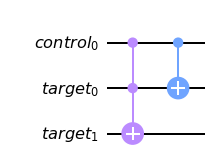

In [2]:
from qiskit import QuantumRegister 
from qiskit import QuantumCircuit 

c = QuantumRegister(1, 'control')
t = QuantumRegister(2, 'target')

cu = QuantumCircuit(c, t, name = "controlled 13^x mod 35")

# Participant code entry - START
cu.ccx(c, t[0], t[1])
cu.cx(c, t[0])
# Participant code entry - END

cu.draw('mpl')

### Task 2:
Create a circuit ($U^2$) that performs the same unitary, but twice with just a single gate. 

$$
\begin{aligned}
U^2|1\rangle &= |60\rangle \\
U^2|11\rangle &= |50\rangle \\
U^2|60\rangle &= |1\rangle \\
U^2|50\rangle &= |11\rangle \\
\end{aligned}
$$


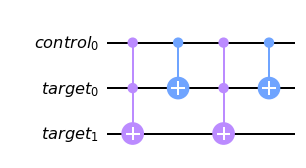

In [5]:
c = QuantumRegister(1, 'control')
t = QuantumRegister(2, 'target')
cu2 = QuantumCircuit(c, t)

# Participant code entry - START
cu2.ccx(c, t[0], t[1])
cu2.cx(c, t[0])
cu2.ccx(c, t[0], t[1])
cu2.cx(c, t[0])
# Participant code entry - END
cu2.draw('mpl')

### Task 3:
Create a circuit ($U^4$) that performs the transformation:

$$
\begin{aligned}
U^4|1\rangle &= |50\rangle \\
U^4|11\rangle &= |1\rangle \\
U^4|60\rangle &= |11\rangle \\
U^4|50\rangle &= |60\rangle \\
\end{aligned}
$$

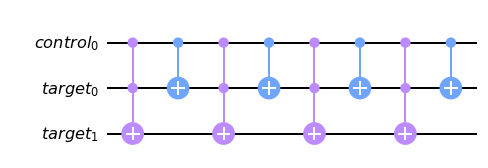

In [6]:
c = QuantumRegister(1, 'control')
t = QuantumRegister(2, 'target')
cu4 = QuantumCircuit(c, t)

# Participant code entry - START
cu4.ccx(c, t[0], t[1])
cu4.cx(c, t[0])
cu4.ccx(c, t[0], t[1])
cu4.cx(c, t[0])
cu4.ccx(c, t[0], t[1])
cu4.cx(c, t[0])
cu4.ccx(c, t[0], t[1])
cu4.cx(c, t[0])
# Participant code entry - END
cu4.draw('mpl')

### Task 4:

To end the exercise your task would be to complete the phase estimation part of Shor's Algorithm. You will have to try incorporating the circuits you just made into the quantum phase estimation algorithm (dont bother including the QFT); just include the controlled gates.

NOTE: We need just the controlled U^x gates and not the entire circuit itself. 

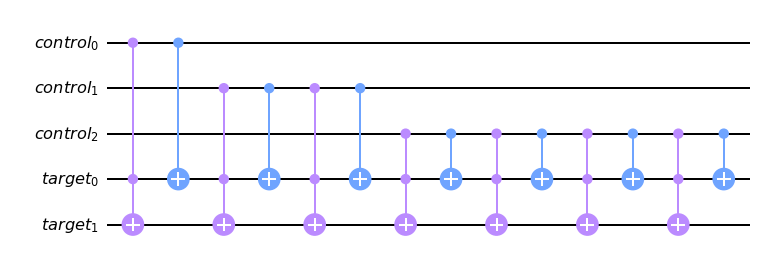

In [10]:
cqr = QuantumRegister(3, 'control')
tqr = QuantumRegister(2, 'target')
cux = QuantumCircuit(cqr, tqr)

# Participant code entry - START
cux.ccx(cqr[0], tqr[0], tqr[1])
cux.cx(cqr[0], tqr[0])
cux.ccx(cqr[1], tqr[0], tqr[1])
cux.cx(cqr[1], tqr[0])
cux.ccx(cqr[1], tqr[0], tqr[1])
cux.cx(cqr[1], tqr[0])
cux.ccx(cqr[2], tqr[0], tqr[1])
cux.cx(cqr[2], tqr[0])
cux.ccx(cqr[2], tqr[0], tqr[1])
cux.cx(cqr[2], tqr[0])
cux.ccx(cqr[2], tqr[0], tqr[1])
cux.cx(cqr[2], tqr[0])
cux.ccx(cqr[2], tqr[0], tqr[1])
cux.cx(cqr[2], tqr[0])
# Participant code entry - END

cux.draw('mpl')

## Additional information

**Created by:** Vivek Subramaniam